# Deep Learning
Deep Learning is a type of machine  learning that uses artifical neural networks to learn from data. Artifical neural networks are inspired by the human brain.

## Single Layer Perceptron / Basic Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset  = pd.read_csv("preceptron_customer_purchase_dataset.csv")

In [3]:
dataset.head(3)

,Age,Income,AdClicks,Purchase
0,56,24000,14,0
1,46,90588,23,1
2,32,121042,29,1


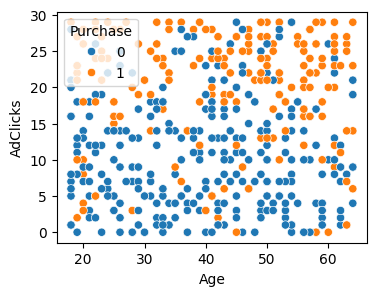

In [4]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age", y="AdClicks", data=dataset, hue="Purchase")
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Purchase"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
pr = Perceptron()
pr.fit(x_train, y_train)

Perceptron()

In [10]:
pr.score(x_train, y_train)*100, pr.score(x_test, y_test)*100

(41.5, 32.0)

## Multilayer Perceptron (ANN)

In [2]:
dataset = pd.read_csv("mlp_practice_dataset.csv")

In [3]:
dataset.head(3)

,Age,BMI,Blood_Pressure,Glucose,Insulin,Skin_Thickness,Diabetic
0,59,28.8,91.2,149.3,62.6,21.1,0
1,72,23.7,90.7,153.1,110.0,19.1,0
2,49,27.8,65.0,129.1,87.8,12.3,0


In [4]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]

In [5]:
input_data.shape

(500, 6)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()

In [8]:
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [11]:
import tensorflow

In [15]:
from keras.layers import Dense, BatchNormalization
from keras.regularizers import L1, L2, L1L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [16]:
ann = Sequential()

In [34]:
ann.add(Dense(4,input_dim = 6, activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(2, activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(1, activation="sigmoid"))

C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
ann.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [36]:
ann.fit(x_train, y_train, batch_size=50, epochs = 10, validation_data=(x_test, y_test), callbacks = EarlyStopping())

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.3561 - loss: 0.8375 - val_accuracy: 0.3200 - val_loss: 0.8332
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3822 - loss: 0.8373 - val_accuracy: 0.4900 - val_loss: 0.8264
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4288 - loss: 0.8298 - val_accuracy: 0.6800 - val_loss: 0.8187
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3992 - loss: 0.8344 - val_accuracy: 0.6800 - val_loss: 0.8111
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4860 - loss: 0.8226 - val_accuracy: 0.6800 - val_loss: 0.8044
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4568 - loss: 0.8172 - val_accuracy: 0.6800 - val_loss: 0.7984
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5812 - loss: 0.8122 - val_accuracy: 0.6800 - val_loss: 0.7926
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5716 - loss: 0.8169 - val_accuracy: 0.6800 - val_loss: 0.78

In [39]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

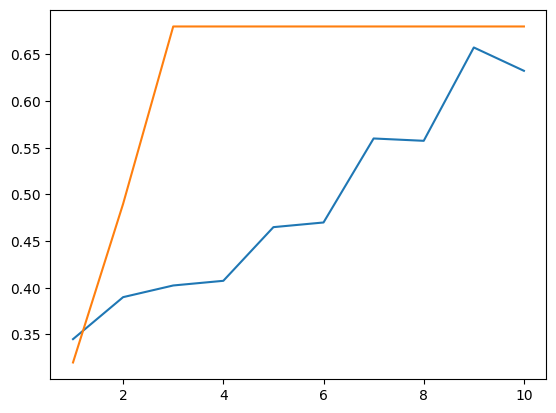

In [40]:
plt.plot([i for i in range(1,11)],train_accuracy)
plt.plot([i for i in range(1,11)],test_accuracy)
plt.show()

In [41]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [42]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
    if i > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, prd_data)

0.68

In [45]:
accuracy_score(y_train, prd_data1)

0.6575

In [46]:
prd1 = ann.predict(np.array([[-1.625039, 0.910547, 0.485495, -1.134185, 1.240032, -1.178237]]))
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)
prd_data1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


[0]